In [1]:
import utils

import numpy as np
import skimage
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.filters import frangi
from skimage.morphology import remove_small_objects, binary_dilation, binary_erosion


np.random.seed(42)

In [2]:
def detect_blood_vessels_using_CV_basics(image, mask):
    
    green_channel = image[:,:,1]
    blured = cv.GaussianBlur(green_channel, (3, 3), 50)
    weighted = cv.addWeighted(green_channel, 2, blured, 1, 10)
    franged = frangi(weighted)
    normalized = utils.normalize_image(franged)*255
    _, thresholded = cv.threshold(normalized, 2.5, 255, cv.THRESH_BINARY)

    filtered = remove_small_objects(thresholded>0, 5000)
    for i in range(4):
        filtered = binary_erosion(filtered)
        if i%2 == 1:
            filtered = binary_dilation(filtered)
    filtered = binary_dilation(filtered)
    

    final_img = filtered * mask[:,:,0]

    return final_img

In [3]:
X_images, y_images = utils.load_all_images()

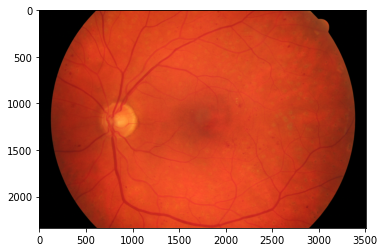

In [4]:
img, mask, manual = *X_images[0], y_images[0]
plt.imshow(img)

In [5]:
result = detect_blood_vessels_using_CV_basics(img, mask)

In [6]:
utils.print_metrics(manual, result)

Confusion matrix:

  313132  |  195087  
--------------------
  103150  | 7573975  

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.97      0.75      0.98      0.86      0.75   7769062
        255       0.62      0.75      0.97      0.68      0.86      0.72    416282

avg / total       0.97      0.96      0.76      0.97      0.86      0.75   8185344



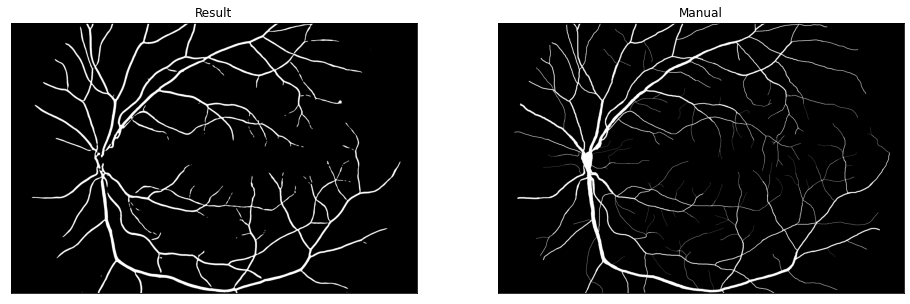

In [7]:
utils.visualize(result=result, manual=manual)

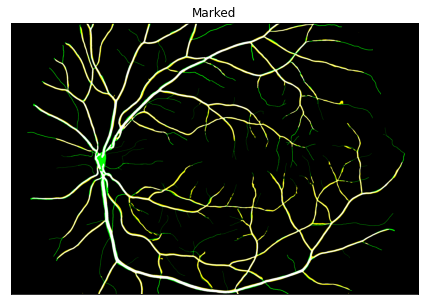

In [8]:
marked = utils.mark_differences(manual, result)

utils.visualize(marked=marked)

# Test

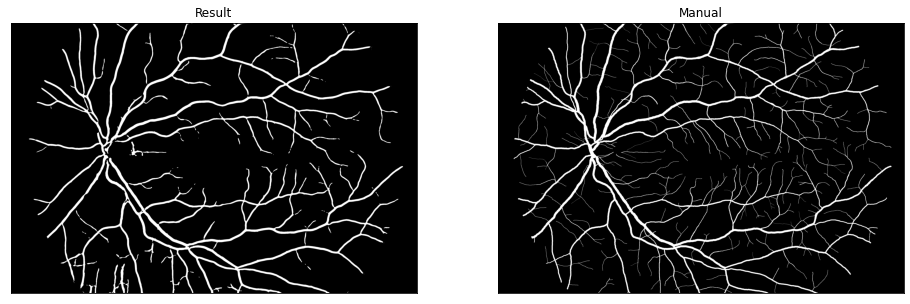

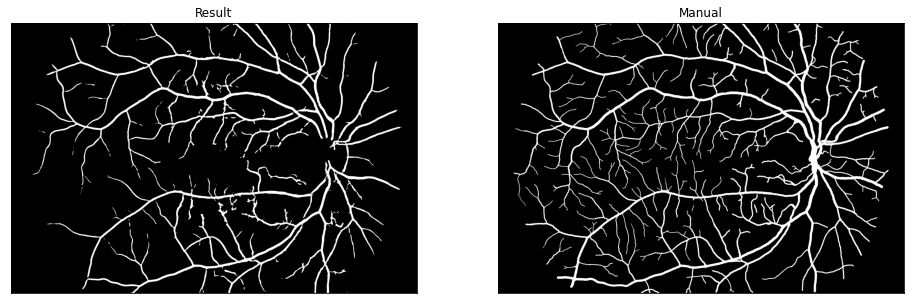

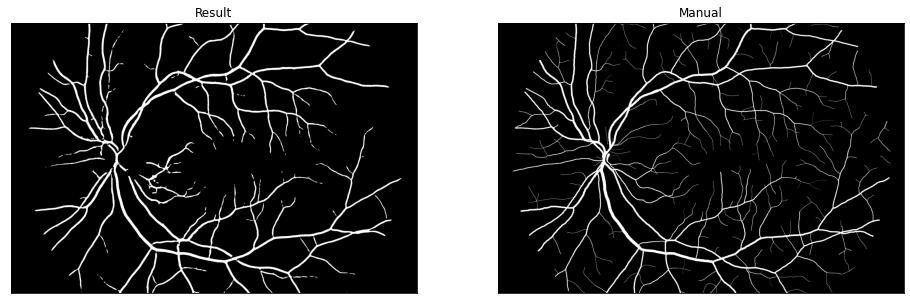

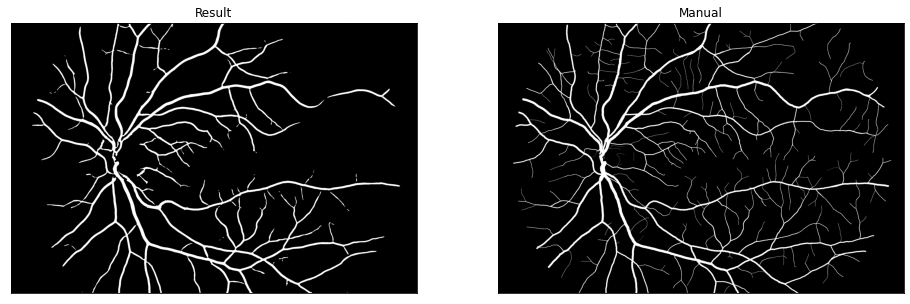

In [9]:
for i in range(4,20,4):
    img, mask, manual = *X_images[i], y_images[i]
    result = detect_blood_vessels_using_CV_basics(img, mask)
    utils.visualize(result=result, manual=manual)